# Calculate return

## 01 Calculate return of a single asset

### 01.1 Simple rate of return: simple_rate_of_return = (final_value - initial_investment) / initial_investment

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

To attain the raw data

In [6]:
import yfinance as yf
PG = yf.download('PG', start='1995-01-01', end = '2023-12-31')

[*********************100%***********************]  1 of 1 completed


In [7]:
PG.head()

Price,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG
Date,,,,,
1995-01-03,7.441167,7.456080,7.366607,7.381519,3318400
1995-01-04,7.381518,7.470991,7.306958,7.411343,2218800
1995-01-05,7.277133,7.366606,7.262221,7.336782,2319600
1995-01-06,7.292046,7.351695,7.232397,7.232397,3438000
1995-01-09,7.262218,7.351691,7.247306,7.321867,1795200


In [8]:
PG.tail()

Price,Close,High,Low,Open,Volume
Ticker,PG,PG,PG,PG,PG
Date,,,,,
2023-12-22,141.751053,142.092557,140.785095,140.990001,4412800
2023-12-26,142.395020,142.619429,141.448580,141.565661,3634900
2023-12-27,142.512115,142.756043,141.829122,142.112071,4569400
2023-12-28,142.190125,142.463322,141.516883,142.453570,5023000
2023-12-29,142.980438,143.390249,142.190116,142.453562,5300900


In [9]:
# to calculate daily simple return
PG['Simple return'] = (PG['Close']/PG['Close'].shift(1)) - 1
print(PG['Simple return'])

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2023-12-22    0.007071
2023-12-26    0.004543
2023-12-27    0.000822
2023-12-28   -0.002259
2023-12-29    0.005558
Name: Simple return, Length: 7300, dtype: float64


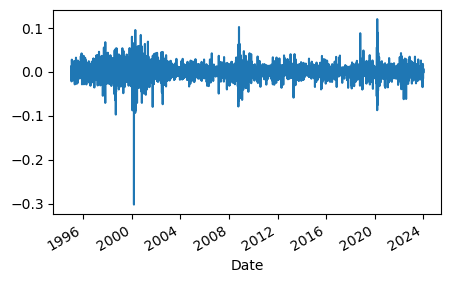

In [10]:
# plot the data
PG['Simple return'].plot(figsize=(5,3))
plt.show()

In [11]:
average_return_daily = PG['Simple return'].mean()
print(average_return_daily)

0.0005030909084375942


In [12]:
average_return_year = PG['Simple return'].mean()*250 # around 250 transaction days per year
print(average_return_year)

0.12577272710939855


### 01.2 Log return: log_return = ln( Price_t / Price_t-1 )

In [14]:
PG['Log return'] = np.log(PG['Close']/PG['Close'].shift(1))

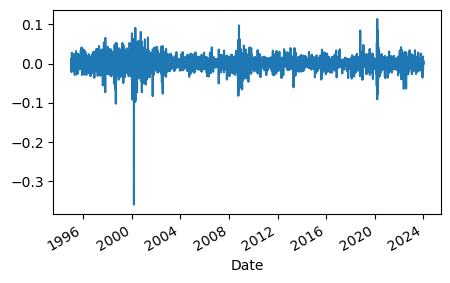

In [15]:
PG['Log return'].plot(figsize=(5,3))
plt.show()

In [16]:
average_return_daily = PG['Log return'].mean()
print(average_return_daily)

0.0004049431547184769


In [17]:
average_return_year = PG['Log return'].mean()*250 # around 250 transaction days per year
print(average_return_year)

0.10123578867961923


## 02 Calculate return of a portfolio

In [19]:
# to import necessary data through yahoo finance
ticker = ['PG','MSFT','F','GE']
pfl_data = pd.DataFrame()
for stock in ticker:
    pfl_data[stock] = yf.download(stock, start='1995-01-01', end = '2023-12-31')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [20]:
pfl_data.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.441167,2.314820,3.569732,20.200659
1995-01-04,7.381518,2.331646,3.665778,20.200659
1995-01-05,7.277133,2.293186,3.633764,20.250172
1995-01-06,7.292046,2.331646,3.633764,20.151154
1995-01-09,7.262218,2.317223,3.697795,19.953106


In [21]:
pfl_data.tail()

,PG,MSFT,F,GE
Date,,,,
2023-12-22,141.751053,371.799713,11.542161,100.383545
2023-12-26,142.395020,371.879120,11.635620,101.001595
2023-12-27,142.512115,371.293518,11.579544,101.643791
2023-12-28,142.190125,372.494507,11.532815,101.738937
2023-12-29,142.980438,373.248871,11.392626,101.191864


In [22]:
pfl_data.iloc[0]

PG       7.441167
MSFT     2.314820
F        3.569732
GE      20.200659
Name: 1995-01-03 00:00:00, dtype: float64

Normalization to 100: ( Price_t / Price_0 ) * 100

In [24]:
pfl_data.iloc[0] # the data for the first day

PG       7.441167
MSFT     2.314820
F        3.569732
GE      20.200659
Name: 1995-01-03 00:00:00, dtype: float64

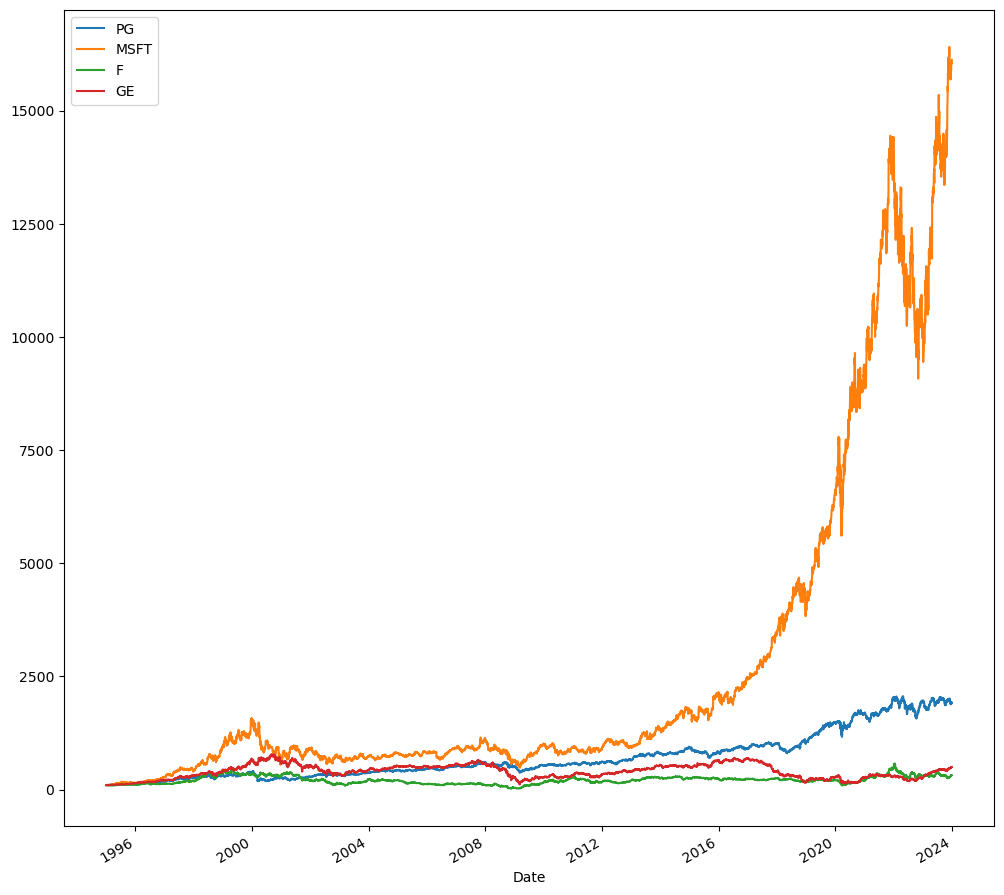

In [25]:
( pfl_data / pfl_data.iloc[0] * 100 ).plot(figsize=(12,12)) # Normalization the data to 100
plt.show()

### To calculate the return of a portlifolio: Assume equal weights ( 0.25 * 4 )

In [27]:
returns = (pfl_data / pfl_data.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008733,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [28]:
weights = np.array([0.25,0.25,0.25,0.25])
np.dot(returns,weights) # np.dot() dot product

array([        nan,  0.00653964, -0.00922959, ...,  0.00019664,
       -0.00053105, -0.0024874 ])

In [29]:
average_returns_year = returns.mean()*250
average_returns_year

PG      0.125773
MSFT    0.222904
F       0.120285
GE      0.106066
dtype: float64

In [30]:
average_portfolio_return_year = np.dot(average_returns_year,weights)
average_portfolio_return_year

0.14375692222439734

In [31]:
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [32]:
average_portfolio_return_year_2 = np.dot(average_returns_year,weights_2)
average_portfolio_return_year_2

0.1628168769960479

## 03 Calculate return of indices

In [34]:
# import data
indices = {
    'S&P500': '^GSPC',
    'NASDAQ': '^IXIC',
    'German DAX': '^GDAXI',
    'London FTSE': '^FTSE'
}
idc_data = pd.DataFrame()
for name, symbol in indices.items():
    # Download historical data
    index_data = yf.download(symbol, start='1997-01-01', end='2023-12-31')['Close']
    idc_data[name] = index_data
idc_data


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,S&P500,NASDAQ,German DAX,London FTSE
Date,,,,
1997-01-02,737.010010,1280.699951,2820.810059,4057.399902
1997-01-03,748.030029,1310.680054,2863.260010,4089.500000
1997-01-06,747.650024,1316.400024,2890.199951,4106.500000
1997-01-07,753.229980,1327.729980,2876.340088,4078.800049
1997-01-08,748.409973,1320.349976,2904.080078,4087.500000
...,...,...,...,...
2023-12-22,4754.629883,14992.969727,16706.179688,7697.500000
2023-12-26,4774.750000,15074.570312,NaN,NaN
2023-12-27,4781.580078,15099.179688,16742.070312,7725.000000


Normalization to 100: ( Price_t / Price_0 ) * 100

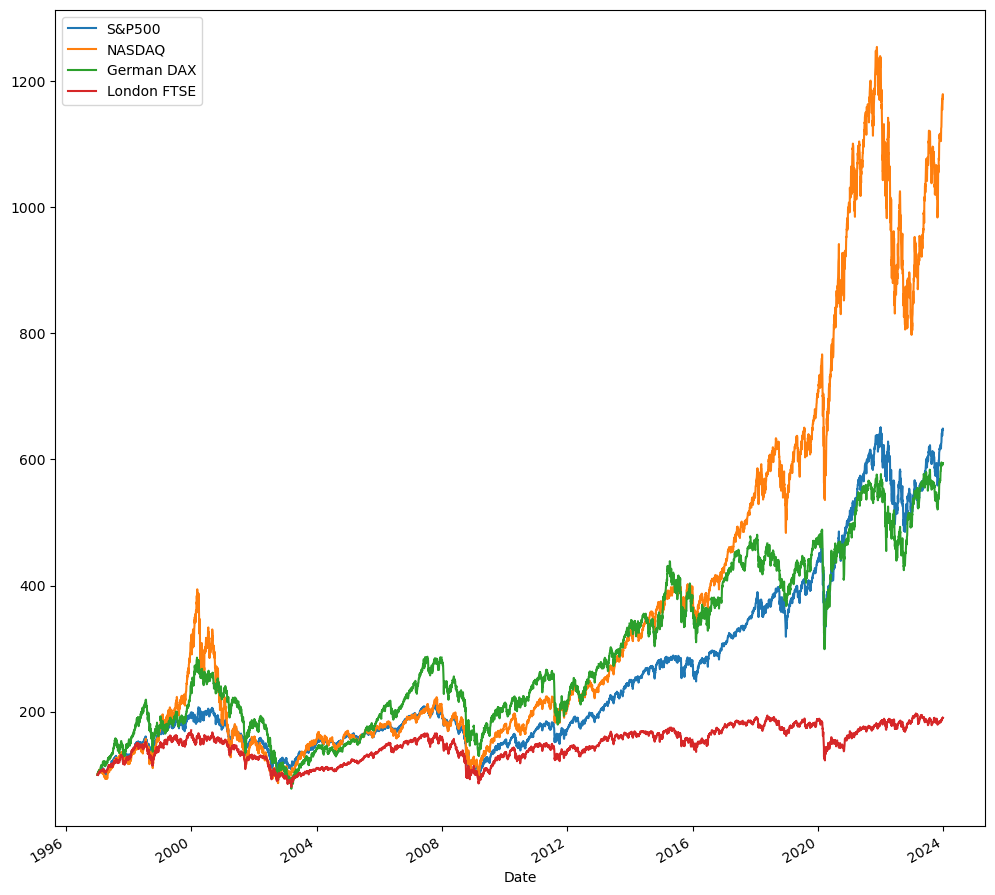

In [36]:
(idc_data / idc_data.iloc[0] * 100).plot(figsize=(12,12))
plt.show()

In [37]:
idc_returns = (idc_data / idc_data.shift(1))-1
idc_returns

,S&P500,NASDAQ,German DAX,London FTSE
Date,,,,
1997-01-02,NaN,NaN,NaN,NaN
1997-01-03,0.014952,0.023409,0.015049,0.007911
1997-01-06,-0.000508,0.004364,0.009409,0.004157
1997-01-07,0.007463,0.008607,-0.004795,-0.006745
1997-01-08,-0.006399,-0.005558,0.009644,0.002133
...,...,...,...,...
2023-12-22,0.001660,0.001945,0.001124,0.000364
2023-12-26,0.004232,0.005443,NaN,NaN
2023-12-27,0.001430,0.001633,NaN,NaN


In [38]:
idc_returns_year = idc_returns.mean() * 250
idc_returns_year

S&P500         0.087706
NASDAQ         0.121865
German DAX     0.078682
London FTSE    0.037560
dtype: float64

## 04 Calculate return of mixture of indices and stocks 
### Take 'Procter & Gamble' as an example

In [40]:
# import data
stocks = {
    'Procter & Gamble': 'PG',
    'S&P500': '^GSPC',
    'Dow Jones': '^DJI'
}
mix_data = pd.DataFrame()
for name, symbol in stocks.items():
    # Download historical data
    index_data = yf.download(symbol, start='1997-01-01', end='2023-12-31')['Close']
    mix_data[name] = index_data
mix_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Procter & Gamble,S&P500,Dow Jones
Date,,,
1997-01-02,13.249590,737.010010,6442.490234
1997-01-03,13.467050,748.030029,6544.089844
1997-01-06,13.560247,747.650024,6567.180176
1997-01-07,13.808779,753.229980,6600.660156
1997-01-08,13.560247,748.409973,6549.479980
...,...,...,...
2023-12-22,141.751053,4754.629883,37385.968750
2023-12-26,142.395035,4774.750000,37545.328125
2023-12-27,142.512100,4781.580078,37656.519531


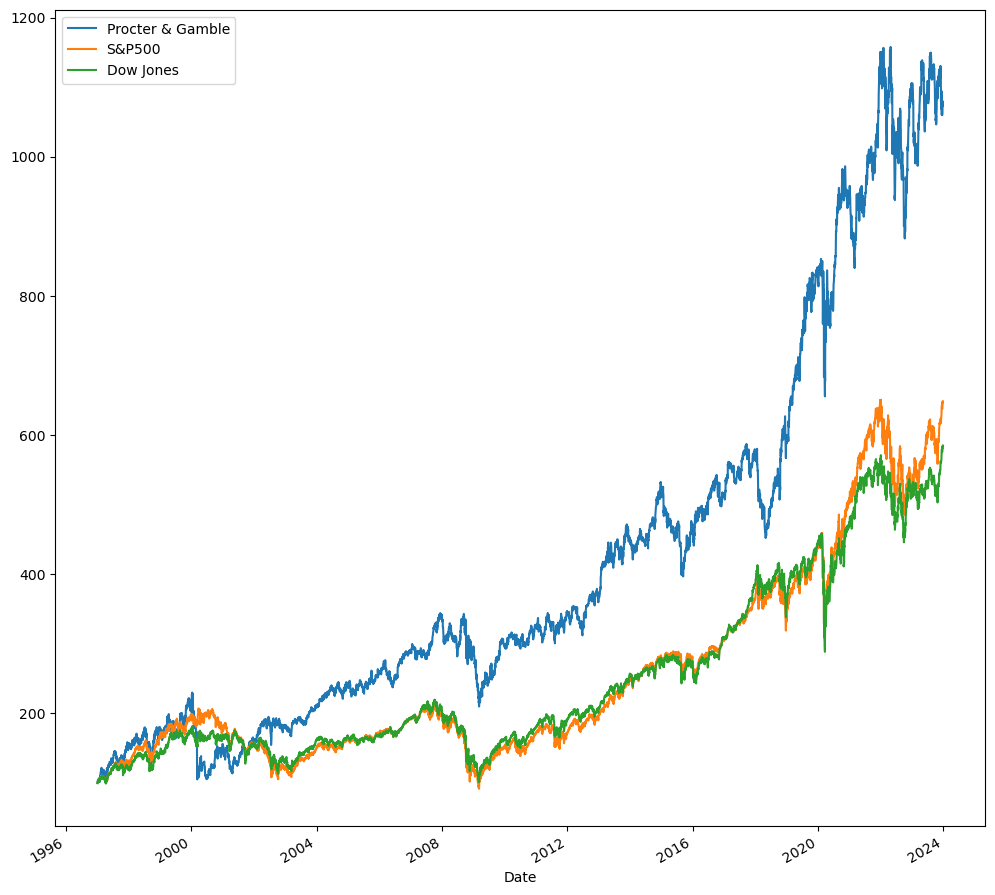

In [41]:
(mix_data / mix_data.iloc[0] * 100).plot(figsize=(12,12))
plt.show()

In [42]:
mix_returns = (mix_data / mix_data.shift(1))-1
mix_returns

,Procter & Gamble,S&P500,Dow Jones
Date,,,
1997-01-02,NaN,NaN,NaN
1997-01-03,0.016413,0.014952,0.015770
1997-01-06,0.006920,-0.000508,0.003528
1997-01-07,0.018328,0.007463,0.005098
1997-01-08,-0.017998,-0.006399,-0.007754
...,...,...,...
2023-12-22,0.007071,0.001660,-0.000491
2023-12-26,0.004543,0.004232,0.004263
2023-12-27,0.000822,0.001430,0.002962


In [43]:
mix_returns_year = mix_returns.mean() * 250
mix_returns_year

Procter & Gamble    0.112549
S&P500              0.087706
Dow Jones           0.082281
dtype: float64